In [1]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from ultralytics import YOLO
from PIL import Image

In [2]:
train_directory = "./datasets/train/train"
test_directory = "./datasets/valid/valid"

train_paths = sorted(os.path.join(train_directory, file) for file in os.listdir(train_directory))
test_paths =  sorted(os.path.join(test_directory, file) for file in os.listdir(test_directory))

In [3]:
def preprocess_annotations(path):
    df = pd.read_json(path)
    df["category_id"] = df["category_id"].replace(2, 0)
    return df

train_annotations = preprocess_annotations('./datasets/combined_annotations')
test_annotations = preprocess_annotations('./datasets/valid_annotations')

train_annotations.head()

,id,image_id,category_id,bbox,area,segmentation,iscrowd
0,0,0,1,"[119, 25, 205, 606]",124230,[],0
1,1,1,1,"[131, 82, 327, 440]",143880,[],0
2,2,2,0,"[225, 298, 198, 185]",36630,[],0
3,3,3,0,"[468, 109, 172, 193]",33196,[],0
4,4,4,1,"[14, 242, 611, 154]",94094,[],0


In [4]:
#Image Enhancement by increase test set.
# for i in range(500):
#     filename = f"./datasets/train/train/image_id_{str(i).zfill(3)}.jpg"
#     image = Image.open(filename)

#     #horizontal filpped picture
#     flipped_image = image.transpose(Image.FLIP_LEFT_RIGHT)

#     # save picture
#     flipped_image.save(f"./datasets/images/test/image_id_{str(i+500).zfill(3)}.jpg")

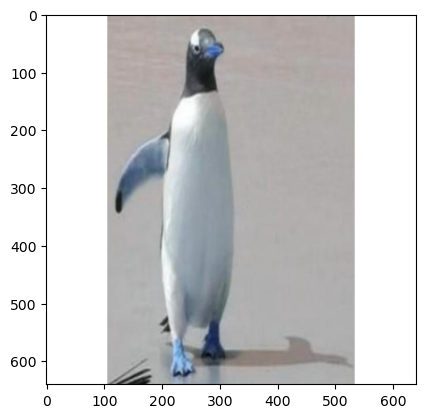

In [5]:
#show image
test_img = cv2.imread("./datasets/train/train/image_id_000.jpg")
plt.imshow(test_img)
plt.show()


image 1/1 D:\jupyter\Untitled Folder 1\datasets\train\train\image_id_000.jpg: 640x640 1 person, 331.8ms
Speed: 3.0ms preprocess, 331.8ms inference, 8.9ms postprocess per image at shape (1, 3, 640, 640)


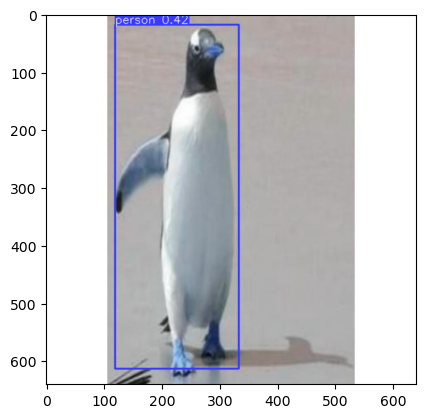

In [6]:
# pretrained yolo model result without any personal training
model = YOLO("./models/yolov8n.pt", task='detect') 
# model = YOLO('yolov8n.pt')

results = model("./datasets/train/train/image_id_000.jpg")
res = results[0].plot()
plt.imshow(res)
plt.show()

In [7]:
#using provide dataset training 30 echos 

model = YOLO("./models/yolov8n.pt", task='detect') 
model.train(data="./datasets/Penguins-vs-Turtles.yaml", epochs=30)  # train the model
metrics = model.val()


New https://pypi.org/project/ultralytics/8.0.142 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.135  Python-3.9.13 torch-2.0.1+cpu CPU (12th Gen Intel Core(TM) i7-12700H)
yolo\engine\trainer: task=detect, mode=train, model=./models/yolov8n.pt, data=./datasets/Penguins-vs-Turtles.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnost

       8/30         0G      1.291      2.055      1.552          8        640: 100%|██████████| 63/63 [09:46<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [02:54
                   all       1000        500      0.338      0.428      0.304      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       9/30         0G      1.353      2.107      1.542          6        640: 100%|██████████| 63/63 [09:44<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [02:55
                   all       1000        500       0.27      0.406      0.241      0.127

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      10/30         0G      1.348      2.056      1.591          7        640: 100%|██████████| 63/63 [09:50<00:00,  9.
                 Class     Images  Instances      Box(P         

      28/30         0G      0.626      1.146      1.116          3        640: 100%|██████████| 63/63 [09:38<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [02:52
                   all       1000        500       0.49      0.956      0.526      0.459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      29/30         0G     0.5964      1.168      1.099          3        640: 100%|██████████| 63/63 [09:34<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [02:42
                   all       1000        500      0.487      0.968      0.524      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      30/30         0G     0.5718      1.112      1.054          4        640: 100%|██████████| 63/63 [08:44<00:00,  8.
                 Class     Images  Instances      Box(P         

In [8]:
success = model.export(format='onnx')

Ultralytics YOLOv8.0.135  Python-3.9.13 torch-2.0.1+cpu CPU (12th Gen Intel Core(TM) i7-12700H)

PyTorch: starting from runs\detect\train5\weights\best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (6.0 MB)

ONNX: starting export with onnx 1.14.0 opset 17...
ONNX: export success  1.9s, saved as runs\detect\train5\weights\best.onnx (11.7 MB)

Export complete (4.3s)
Results saved to D:\jupyter\Untitled Folder 1\runs\detect\train5\weights
Predict:         yolo predict task=detect model=runs\detect\train5\weights\best.onnx imgsz=640 
Validate:        yolo val task=detect model=runs\detect\train5\weights\best.onnx imgsz=640 data=./datasets/Penguins-vs-Turtles.yaml 
Visualize:       https://netron.app


============== Diagnostic Run torch.onnx.export version 2.0.1+cpu ==============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================




image 1/1 D:\jupyter\Untitled Folder 1\datasets\train\train\image_id_000.jpg: 640x640 1 Penguin, 495.7ms
Speed: 5.6ms preprocess, 495.7ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


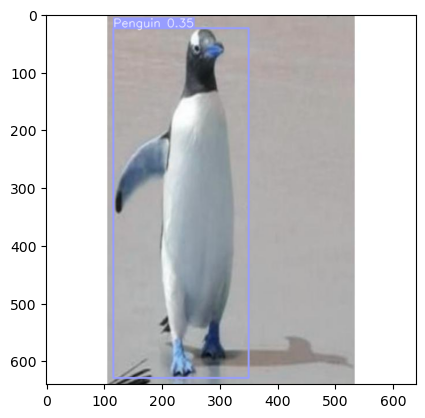

In [9]:
results = model("./datasets/train/train/image_id_000.jpg")
res = results[0].plot()
plt.imshow(res)
plt.show()

In [10]:
# # load model
# model = YOLO("./models/best.pt")

In [13]:
import math
import math
def calculate_distance(rectangle1, rectangle2):
    x1, y1, width_1, height_1 = rectangle1
    x2, y2, width_2, height_2 = rectangle2
    x2 += width_2/2
    x1 += width_1/2
    y2 += height_2/2
    y1 += height_1/2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
def calculate_overlap_ratio(rectangle1, rectangle2):
    x1_1, y1_1, width_1, height_1 = rectangle1
    x1_2, y1_2, width_2, height_2 = rectangle2
    
    x2_1 = x1_1 + width_1
    y2_1 = y1_1 + height_1
    x2_2 = x1_2 + width_2
    y2_2 = y1_2 + height_2
    
    x1_overlap = max(x1_1, x1_2)
    y1_overlap = max(y1_1, y1_2)
    x2_overlap = min(x2_1, x2_2)
    y2_overlap = min(y2_1, y2_2)
    
    width_overlap = max(0, x2_overlap - x1_overlap)
    height_overlap = max(0, y2_overlap - y1_overlap)
    
    area_overlap = width_overlap * height_overlap
    area_total = width_1 * height_1 + width_2 * height_2 - area_overlap
    
    overlap_ratio = area_overlap / area_total
    
    return overlap_ratio

In [14]:
act_labels = []
val_labels = []
IOU = []
distance = []

for i in range(72):
    # actully data
    filename = f"./datasets/valid/valid/image_id_{str(i).zfill(3)}.jpg"
    results = model(filename, save=True)
    try:
        r = int(list(results[0].boxes.cls)[0])
        act_labels.append(r)
        n = results[0].boxes.xywh
        p = results[0].boxes.xyxy
        n = n.tolist()[0]
        p = p.tolist()[0]
        b = [p[0],p[1],n[2],n[3]]
    except:
        act_labels.append(1)
        b = [0,0,0,0]
    
    
    
    #annotation data
    a = test_annotations.bbox[i]
    c = calculate_overlap_ratio(a,b)
    IOU.append(c)
    dis =  calculate_distance(a,b)
    distance.append(dis)
        
    va = int(test_annotations.category_id[i])
    val_labels.append(va)


image 1/1 D:\jupyter\Untitled Folder 1\datasets\valid\valid\image_id_000.jpg: 640x640 1 Penguin, 494.2ms
Speed: 6.0ms preprocess, 494.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict

image 1/1 D:\jupyter\Untitled Folder 1\datasets\valid\valid\image_id_001.jpg: 640x640 1 Turtle, 1 Penguin, 462.8ms
Speed: 5.5ms preprocess, 462.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict2

image 1/1 D:\jupyter\Untitled Folder 1\datasets\valid\valid\image_id_002.jpg: 640x640 1 Turtle, 374.4ms
Speed: 5.3ms preprocess, 374.4ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict3

image 1/1 D:\jupyter\Untitled Folder 1\datasets\valid\valid\image_id_003.jpg: 640x640 1 Turtle, 352.0ms
Speed: 7.0ms preprocess, 352.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4

image 1/1 D:\jupyter\Unt

Results saved to runs\detect\predict33

image 1/1 D:\jupyter\Untitled Folder 1\datasets\valid\valid\image_id_033.jpg: 640x640 1 Turtle, 482.4ms
Speed: 3.9ms preprocess, 482.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict34

image 1/1 D:\jupyter\Untitled Folder 1\datasets\valid\valid\image_id_034.jpg: 640x640 1 Turtle, 337.1ms
Speed: 6.0ms preprocess, 337.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict35

image 1/1 D:\jupyter\Untitled Folder 1\datasets\valid\valid\image_id_035.jpg: 640x640 1 Turtle, 349.1ms
Speed: 6.0ms preprocess, 349.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict36

image 1/1 D:\jupyter\Untitled Folder 1\datasets\valid\valid\image_id_036.jpg: 640x640 1 Turtle, 350.6ms
Speed: 4.0ms preprocess, 350.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\pre

Results saved to runs\detect\predict66

image 1/1 D:\jupyter\Untitled Folder 1\datasets\valid\valid\image_id_066.jpg: 640x640 1 Turtle, 514.2ms
Speed: 7.0ms preprocess, 514.2ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict67

image 1/1 D:\jupyter\Untitled Folder 1\datasets\valid\valid\image_id_067.jpg: 640x640 1 Turtle, 458.6ms
Speed: 6.1ms preprocess, 458.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict68

image 1/1 D:\jupyter\Untitled Folder 1\datasets\valid\valid\image_id_068.jpg: 640x640 1 Penguin, 343.6ms
Speed: 5.0ms preprocess, 343.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict69

image 1/1 D:\jupyter\Untitled Folder 1\datasets\valid\valid\image_id_069.jpg: 640x640 1 Penguin, 438.7ms
Speed: 4.0ms preprocess, 438.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\p

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(act_labels, val_labels)
precision = precision_score(act_labels, val_labels)
recall = recall_score(act_labels, val_labels)
f1 = f1_score(act_labels, val_labels)
cm = confusion_matrix(act_labels, val_labels)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:", cm)

Accuracy: 0.9027777777777778
Precision: 0.9166666666666666
Recall: 0.8918918918918919
F1-score: 0.9041095890410958
Confusion Matrix: [[32  3]
 [ 4 33]]


In [17]:
print(IOU)
import statistics

mean_value = statistics.mean(IOU)
print("mean:", mean_value)


std_deviation = statistics.stdev(IOU)
print("standard deviation:", std_deviation)

[0.9652327249968621, 0.0, 0.8243740268383223, 0.9771480700344481, 0.8687245288748713, 0.924652974345955, 0.9224717467958025, 0.965257954010877, 0.9303385575045773, 0.9600088442991915, 0.635745525079637, 0.96945448479935, 0.8959144617440356, 0.8461872937672337, 0.8833060205162825, 0.9830820794082032, 0.9240498947855135, 0.8655371745117308, 0.0, 0.9422968697731046, 0.0, 0.0, 0.8494447318970133, 0.964164388122085, 0.9632650670620377, 0.8897898653971282, 0.6020499801952256, 0.98609931800211, 0.9396480184690134, 0.897603733237302, 0.8021374464131555, 0.9622568344207573, 0.8433540932648051, 0.8861703352356082, 0.9344426991322713, 0.8812540892799812, 0.9249015090139159, 0.9009733786121551, 0.8445013491379543, 0.0, 0.9359181543476716, 0.9426034004534969, 0.9845926269223221, 0.7637724324718371, 0.9358453267468156, 0.930341043308322, 0.9359059652535661, 0.9740395916593182, 0.9708491571651993, 0.9294676414087503, 0.0, 0.9605459290340164, 0.9501936868133268, 0.9699733649458463, 0.9811529432370373,

In [18]:
print(distance)

mean_value = statistics.mean(distance)
print("mean:", mean_value)


std_deviation = statistics.stdev(distance)
print("standard deviation:", std_deviation)

[1.885163240789311, 374.67226955240403, 10.198341392307903, 2.098034461263379, 15.790497596420398, 10.897722940419412, 15.981149662233593, 2.57980938655404, 6.840717020827413, 2.376871808388729, 86.37030130600361, 2.1930304908707776, 17.670680938598583, 7.239269234599905, 17.733904015835847, 1.3882161504608952, 3.7178376690521713, 8.063556165095529, 401.60210407815345, 10.248104111748075, 458.8106908083115, 528.2901664805053, 14.467943690121325, 2.8594790709508175, 3.195507548461723, 22.309581259359312, 73.67378193486846, 1.021160700927291, 2.6415420335246953, 8.052459435750588, 40.88618402798193, 2.301447275882737, 27.23953128457985, 8.545914790639486, 1.98368911312979, 6.209838615528907, 9.47697554505682, 2.089114460525402, 7.44378824771747, 501.42297514174595, 11.189435806450781, 7.869823738681527, 0.9895983318919723, 41.22169658024165, 4.807005163380534, 7.289747905494145, 6.42544250124402, 1.5655948405630555, 3.1875511250723054, 5.699756384606422, 472.83030782723733, 6.36091676851

In [23]:
results = []
for i in range(72):
    filename = f"./datasets/valid/valid/image_id_{str(i).zfill(3)}.jpg"
    mod = model(filename)
    try:
        n = mod[0].boxes.xywh
        p = mod[0].boxes.xyxy
        n = n.tolist()[0]
        p = p.tolist()[0]
        b = [p[0],p[1],n[2],n[3]]
    except:
        b = [0,0,0,0]
    results.append([
        i,     # image id
        act_labels[i],# pred label
        val_labels[i],# truth label
        True if act_labels[i] == val_labels[i] else False,
        test_annotations.bbox[i],   # truth bbox
        b,                                # pred bbox
        IOU[i]                                    # IoU
    ])

pd_results = pd.DataFrame(results, columns=['image_id', 'truth_label', 'pred_label', 'is_label_correct', 'truth_bbox', 'pred_bbox', 'iou'])
pd_results.to_csv("./results/YOLO_Valid.csv", index=False)

pd_results


image 1/1 D:\jupyter\Untitled Folder 1\datasets\valid\valid\image_id_000.jpg: 640x640 1 Penguin, 415.8ms
Speed: 6.0ms preprocess, 415.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 D:\jupyter\Untitled Folder 1\datasets\valid\valid\image_id_001.jpg: 640x640 1 Turtle, 1 Penguin, 464.2ms
Speed: 6.4ms preprocess, 464.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 D:\jupyter\Untitled Folder 1\datasets\valid\valid\image_id_002.jpg: 640x640 1 Turtle, 513.2ms
Speed: 6.0ms preprocess, 513.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 D:\jupyter\Untitled Folder 1\datasets\valid\valid\image_id_003.jpg: 640x640 1 Turtle, 464.0ms
Speed: 6.1ms preprocess, 464.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 D:\jupyter\Untitled Folder 1\datasets\valid\valid\image_id_004.jpg: 640x640 1 Penguin, 480.9ms
Speed: 4.5ms preprocess, 480.9ms inference, 2.0ms postprocess per imag

Speed: 5.9ms preprocess, 443.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 D:\jupyter\Untitled Folder 1\datasets\valid\valid\image_id_041.jpg: 640x640 1 Turtle, 462.2ms
Speed: 6.7ms preprocess, 462.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 D:\jupyter\Untitled Folder 1\datasets\valid\valid\image_id_042.jpg: 640x640 1 Penguin, 462.7ms
Speed: 6.9ms preprocess, 462.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 D:\jupyter\Untitled Folder 1\datasets\valid\valid\image_id_043.jpg: 640x640 1 Turtle, 418.1ms
Speed: 8.0ms preprocess, 418.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 D:\jupyter\Untitled Folder 1\datasets\valid\valid\image_id_044.jpg: 640x640 1 Turtle, 444.7ms
Speed: 1.0ms preprocess, 444.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 D:\jupyter\Untitled Folder 1\datasets\valid\valid\image_id_045.jpg: 640x640 1 

,image_id,truth_label,pred_label,is_label_correct,truth_bbox,pred_bbox,iou
0,0,1,1,True,"[227, 93, 298, 525]","[226.12249755859375, 87.8568115234375, 303.382...",0.965233
1,1,1,0,False,"[211, 198, 428, 259]","[1.6078872680664062, 122.03851318359375, 97.52...",0.000000
2,2,0,0,True,"[0, 243, 512, 267]","[28.047760009765625, 226.5710906982422, 450.27...",0.824374
3,3,0,1,False,"[128, 178, 457, 354]","[122.43890380859375, 179.13111877441406, 463.9...",0.977148
4,4,1,1,True,"[168, 131, 296, 469]","[160.16851806640625, 148.1981201171875, 320.08...",0.868725
...,...,...,...,...,...,...,...
67,67,0,0,True,"[198, 288, 273, 135]","[188.7044677734375, 286.29241943359375, 292.21...",0.898565
68,68,1,1,True,"[58, 225, 205, 283]","[56.58490753173828, 225.86459350585938, 207.77...",0.980276
69,69,1,1,True,"[162, 109, 351, 327]","[160.07069396972656, 106.88177490234375, 345.1...",0.962039
70,70,0,0,True,"[23, 87, 539, 454]","[28.976806640625, 88.77207946777344, 531.05993...",0.967369
